In [1]:
import pandas as pd
import sqlite3
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import folium
sns.set(rc={'axes.facecolor':'f3f4f6', 'figure.facecolor':'#f3f4f6'})
sns.set(rc = {'figure.figsize':(15,8)})

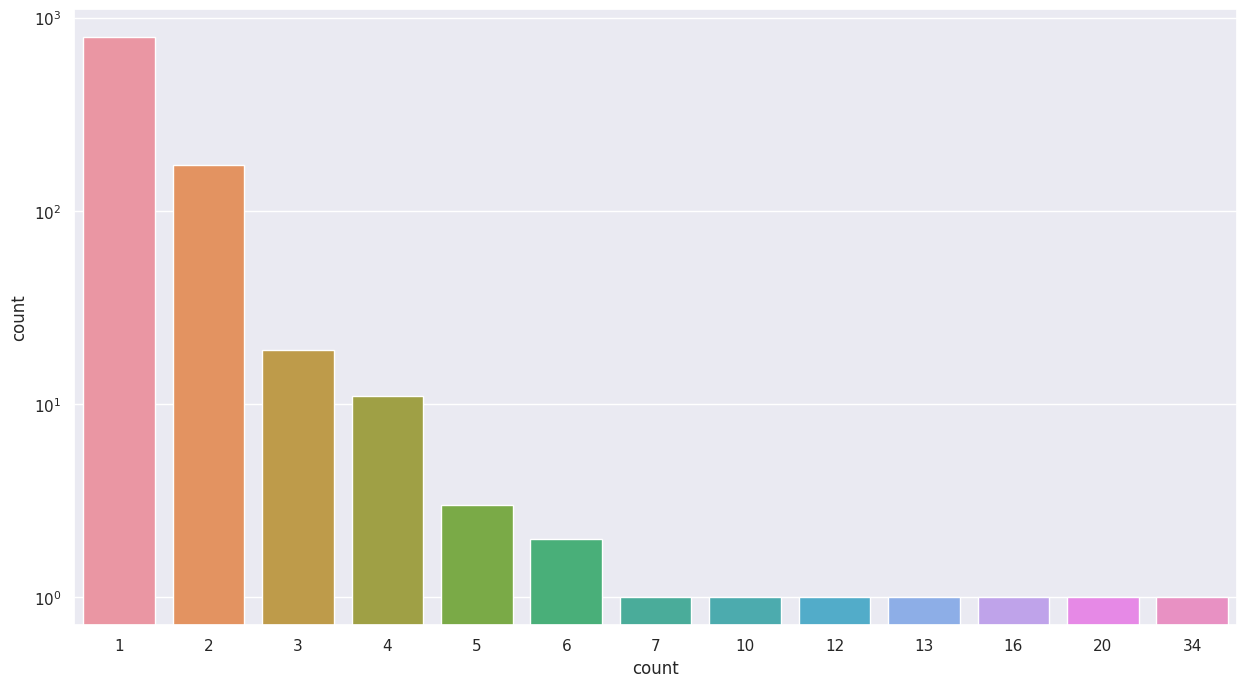

In [2]:
con = sqlite3.connect("wg-gesucht-analysis.sqlite")
df = pd.read_sql_query("select count(*) as count from messages group by chat_id", con)
con.close()
f, ax = plt.subplots()
sns.countplot(x="count",data=df)
plt.yscale("log")
plt.savefig("out.png") 


In [3]:
con = sqlite3.connect("wg-gesucht-analysis.sqlite")
df = pd.read_sql_query("select * from chat", con)
con.close()

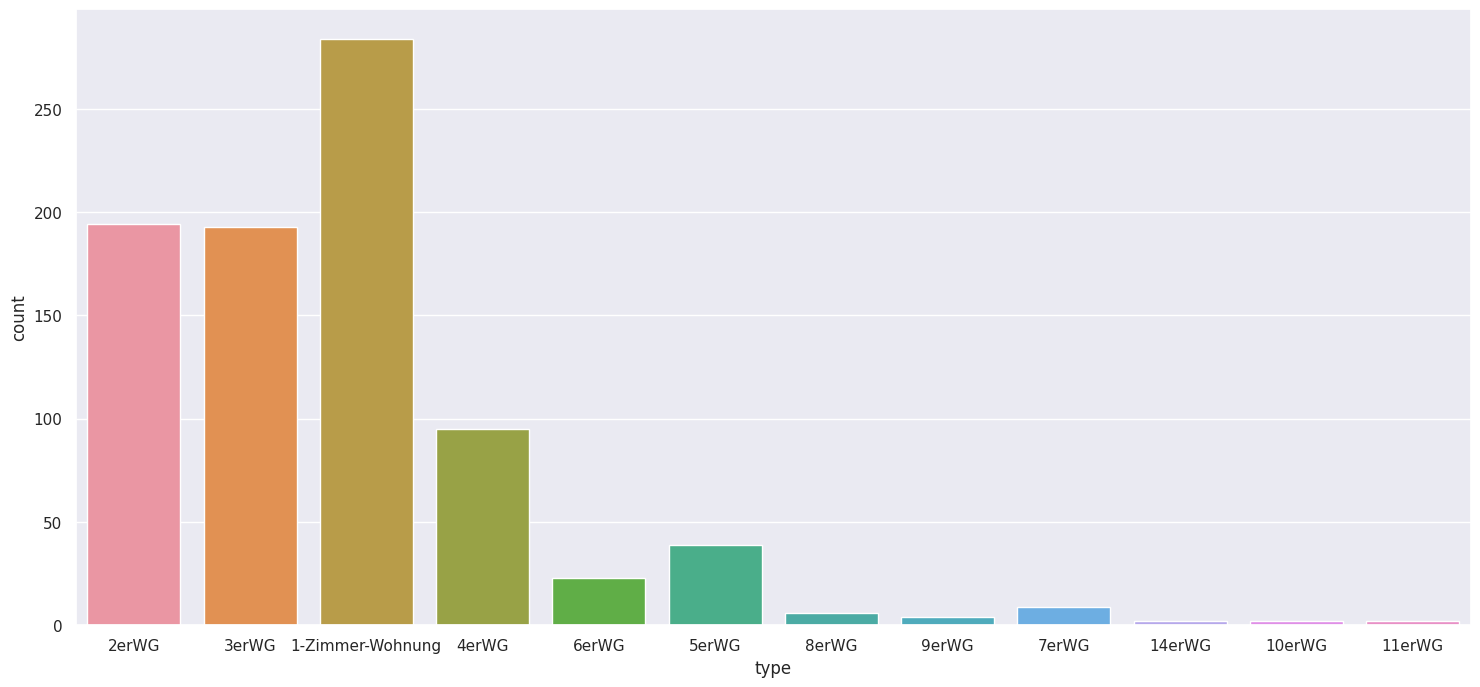

In [12]:
plt.figure(figsize = (18,8))
sns.countplot(x="type",data=df)
plt.savefig("type")

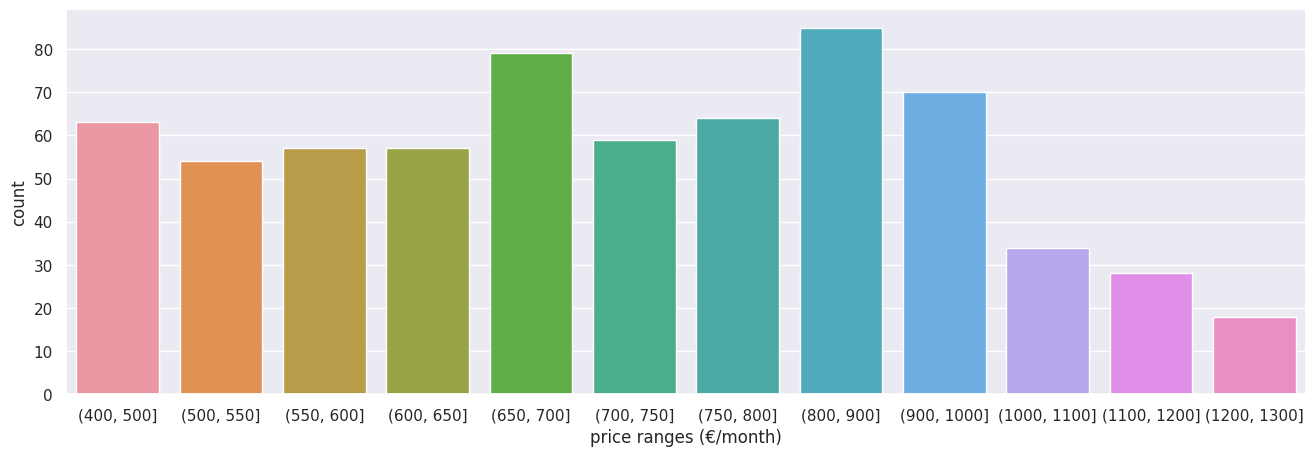

In [5]:
df['bins'] = pd.cut(x=df['price'], bins=[400,500, 550,600, 650,700,750,800,900,1000,1100,1200,1300])
f, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x="bins",data=df)
ax.set(xlabel='price ranges (€/month)', ylabel='count')
plt.savefig("price")

In [17]:
import io
from PIL import Image

m = folium.Map(location=[48.1351, 11.5820], tiles="OpenStreetMap", zoom_start=10)
counter=0
for index, row in df.iterrows():
    if row["lat"] is not None and row["lon"] is not None:
        counter+=1
        folium.Marker(
            [row["lat"], row["lon"]],
            tooltip=row["distance_from_campus"],
        ).add_to(m)
m
m.save("a.html")

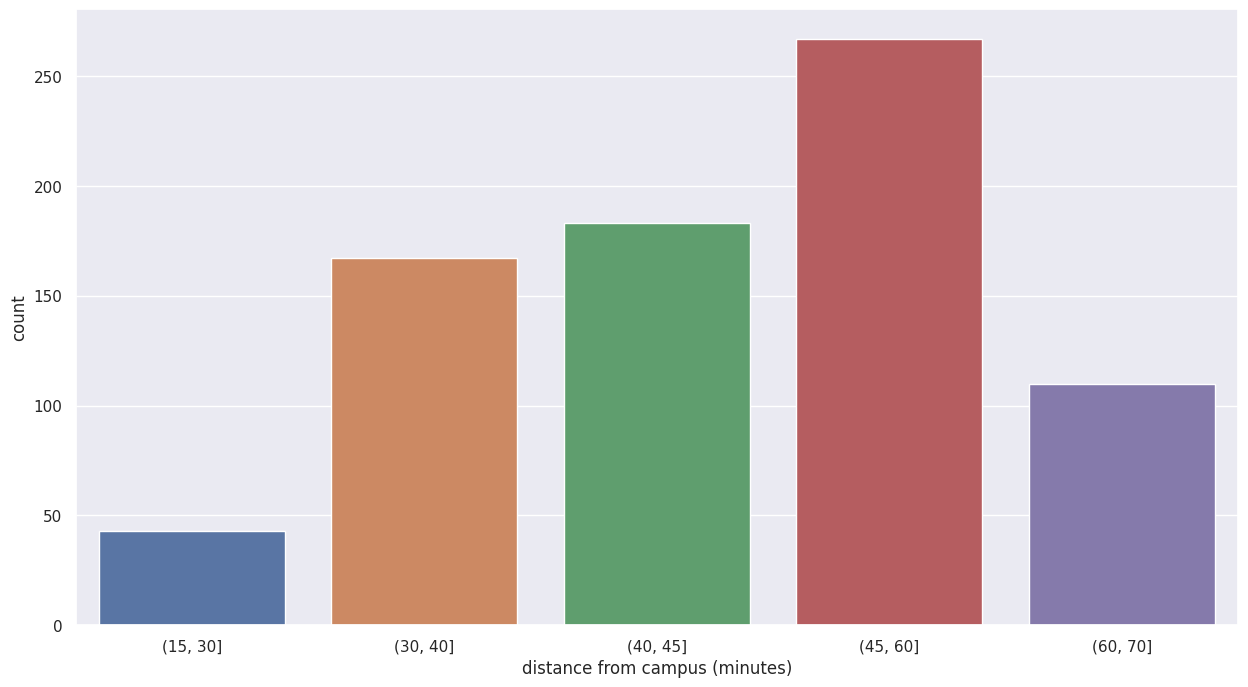

In [7]:
df = df.astype({"distance_from_campus": float})
df['bins'] = pd.cut(x=df['distance_from_campus'], bins=[15,30,40,45,60,70])
ax=sns.countplot(x="bins",data=df)
ax.set(xlabel="distance from campus (minutes)")
plt.show()

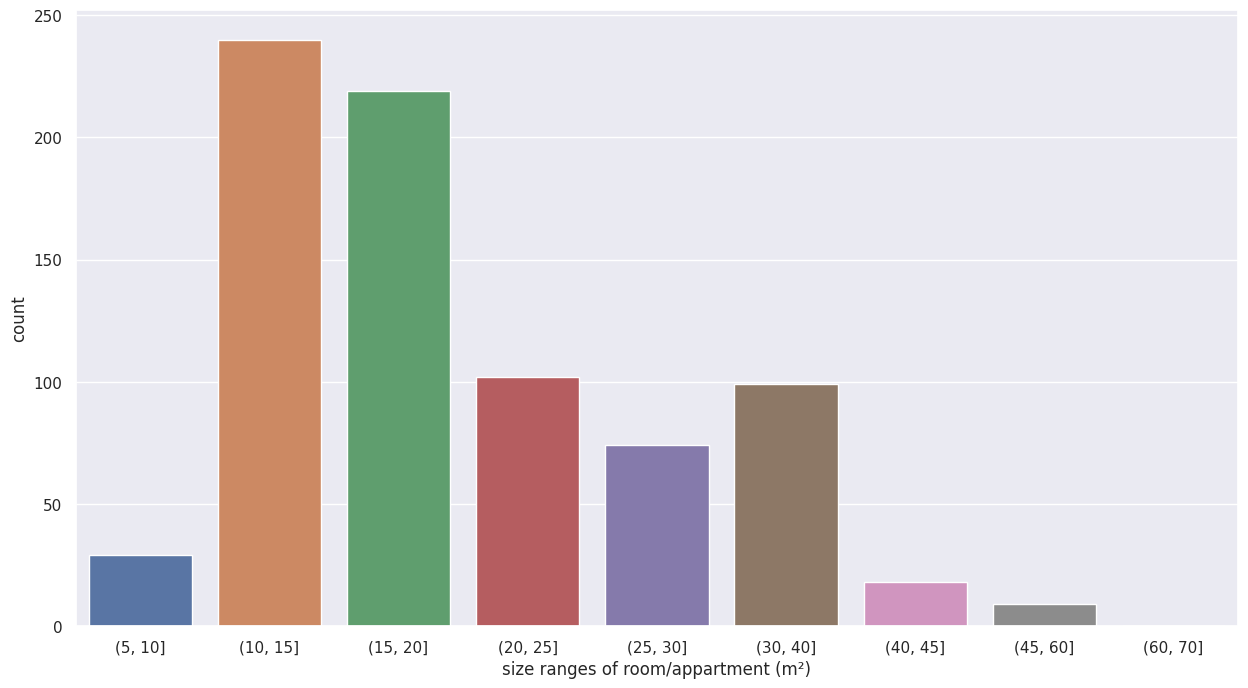

In [8]:
df = df.astype({"size": float})
df['bins_size'] = pd.cut(x=df['size'], bins=[5,10,15,20,25,30,40,45,60,70])
ax=sns.countplot(x="bins_size",data=df)
ax.set(xlabel="size ranges of room/appartment (m²)")
plt.savefig("size")